# 1. St. Petersburg paradox

**a. Assuming that you are allowed to play this game once in a casino exactly as stated above, what would you yourself be willing to pay to enter the game (reasoning rationally, and momentarily forgetting any personal objections against gambling)?**

Rationality (maths) tells me to pay anything less than an infinite amount of money since the expected return is infinite. Intuition tells me 2 sek is enough (lose 1 sek half of the time, either break even or win more the other half).

**b. The formulation of the game and the estimate of its value as infinity makes several unrealistic assumptions, both from the player's point of view and from the casino's point of view. What are these assumptions?**

That the player is willing to play an infinite amount of games and the casino is willing to pay out an infinite amount of money. If neither happens, then the player may stop before he "wins big".

**c. One is that even a large casino does not have infinite resources, and would have to decide on a maximum number of rounds in the game to avoid going bankrupt. Assume that the maximum payout of the casino is X, and implement and perform a simulation that estimates the expected value of the game in this case.**



In [29]:
from matplotlib import pyplot as plt
import random
import numpy as np

**First, choose a reasonable number of X (in SEK) for a large casino. As a guideline, one of the largest casinos in the world is The Venetian in Macau. Their yearly revenue prior to the pandemic was almost 3 billion USD. So, a maximum payout of 10 million SEK or larger seems quite possible.**

In [18]:
# Preferably a power of 2, for convenience
X = 1_048_576    # 2^20

**Present the result of your simulations as a diagram that shows the average payoff calculated over the last n games as a function of n. Choose a suitable maximal number of games N yourself, repeat the simulation a number of times, and include the result of all simulations as well as a mean value in the diagram.**

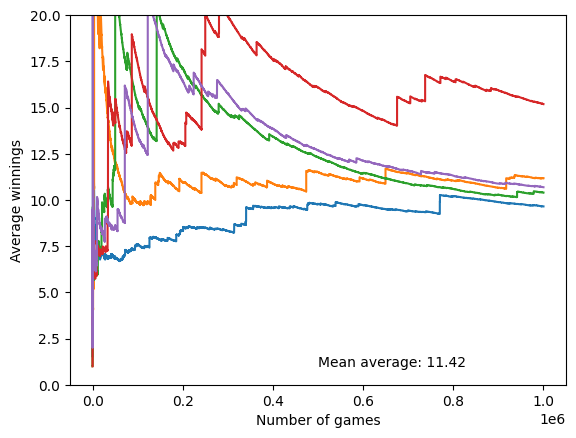

In [104]:
N = 1_000_000

def simulate():
    n = [i+1 for i in range(N)]
    f = [0 for i in range(N)]
    acc = 0
    for i in range(N):
        payout = 1
        while True:
            # Flip the coin
            coin = random.randint(0, 1)
            if coin == 1 or payout >= X:
                acc += payout
                f[i] = acc/(i+1)
                break
            payout *= 2
    plt.plot(n, f)
    plt.ylabel("Average winnings")
    plt.xlabel("Number of games")
    plt.ylim([0, 20])
    return f[-1]

n = 5
sum = 0
for i in range(n):
    sum += simulate()
plt.text(N/2, 1, "Mean average: "+str(round(sum/n, 3)))
plt.show()

**d. Discuss the convergence over time of your simulation. What value do you expect your simulation to converge to at large times? Can you give a mathematical explanation for this value (voluntary exercise)?**

The expected value is the infinite sum of `1/(2^(i+1))*2^i=1/2 from 0 to infinity`, which gives an infinite expected value. However, when we bound it to never pay out more than `X`, we are essentially saying that the sum is no longer infinite, and given our `X` of `2^20` we will only toss the coin 20 times, then pay anyway. Consequently, the expected value becomes `1/2 from 0 to 19 plus 1/(2^20)*2^20`, because if we still paid the player when the payout reaches `2^20`, we shall do it anyway. Therefore, the expected value is `20*1/2 + 1 = 11`, which is very close to the simulation.

# 2. Emergency Department

**Simulate individual arrivals by successively generating random time intervals from one arrival to the next, and sum up the total number of arrivals each day. Show the results both as a time series of the number of patients per day, and as a histogram of the number of daily visitors collected over a longer time (at least a few years).**

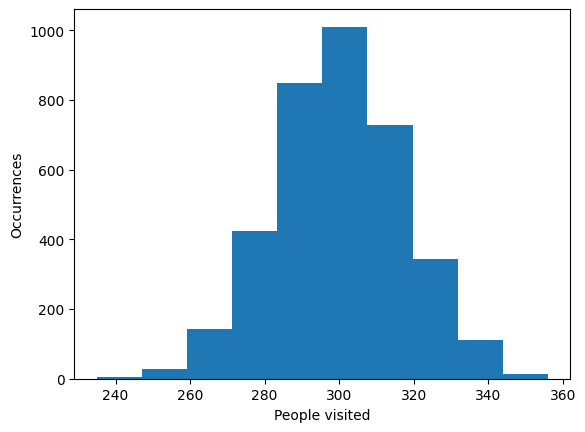

In [127]:
from numpy import random

lam = 300
def arrivals():
    sum = 0
    count = 0
    sum += random.exponential(scale=1/lam)
    while sum < 1:
        count += 1
        sum += random.exponential(scale=1/lam)
    return count

days = 10 * 365
counts = [0 for i in range(days)]
for i in range(days):
    counts[i] = arrivals()
plt.hist(counts)
plt.xlabel("People visited")
plt.ylabel("Occurrences")
plt.show()

**Finally, use the histogram to answer the question posed in the beginning. You may want to make use of the concept of p-value used earlier in the course.**

Not a single day across 10 years had 369 visitors, so it should be quite unreasonable that this is statistically typical. 

**Voluntary exercise: explain how this result could have been obtained in different way by making use of a mathematical result that connects a Poisson process (which is a process in time) and a Poisson distribution (which is a discrete probability distribution without any reference to time).**

I'm assuming it's meant to calculate the probability of 369 visitors by using the Poisson distribution formula directly, [which gives a probability of 0.00001](https://www.wolframalpha.com/input?i=300%5E369*e%5E%28-300%29%2F%28369%21%29).